In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import re

### Load Ground Truth XYZ Position of Path

In [2]:
bag_ids = ['10-39-11', '11-00-21', '11-05-36'] #'10-50-52'
groundtruth = {}
true_xyz = {}
columns = ['header.stamp.secs', 'header.stamp.nsecs',
           'pose.position.x', 'pose.position.y','pose.position.z',
           'pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z',
           'pose.orientation.w']

for bag_id in bag_ids:
    groundtruth[bag_id] = pd.read_csv('~/data/debug2/ONR_2022-07-26-' 
                                      + bag_id + '/csv/_uav1_mavros_local_position_pose.csv')
    true_xyz[bag_id] = groundtruth[bag_id][columns]

### Load VIO XYZ Position of Path

In [3]:
vio_xyz = {}
for bag_id in bag_ids:
    
    lines = []
    with open('/home/river/ros_scripts/lastpose'+bag_id+'.txt', 'r') as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines]
    lines = ' '.join(lines).split('header:')
    lines = lines[1:]
    #lines[-1] = lines[-1][:-1]
    lines = [line[15:].replace(' frame_id: \"world\"', '').replace(' pose:', '').replace('  ', ' ') for line in lines]
    lines = [re.split(': | ', line) for line in lines]
    lines = [line[:3] + line[4:] if len(line) == 21 else line for line in lines]
    
    vio = pd.DataFrame(columns = ['secs', 'nsecs', 'x_pos', 'y_pos', 'z_pos', 'x_orient', 'y_orient', 'z_orient', 'w_orient'])

    for line in lines:
        row = {
            'secs': int(line[1]),
            'nsecs': int(line[3]),
            'x_pos': float(line[6]), 
            'y_pos': float(line[8]),
            'z_pos': float(line[10]),
            'x_orient': float(line[13]),
            'y_orient': float(line[15]),
            'z_orient': float(line[17]),
            'w_orient': float(line[19])
        }
    
        vio = pd.concat([vio, pd.Series(row).to_frame().T], ignore_index=True)
    vio_xyz[bag_id] = vio

In [4]:
print('True  VIO')
for bag_id in bag_ids:
    print(len(true_xyz[bag_id]), len(vio_xyz[bag_id]))

True  VIO
7012 4696
5245 3659
2270 1405


In [14]:
bag = '11-05-36'

In [15]:
def xy_plot(true, vio):
    true_x, true_y = np.array(true['pose.position.x']), np.array(true['pose.position.y'])
    fig, ax = plt.subplots()
    line1 = ax.plot(true_x, true_y, color='blue', label='true')
    
    vio_x, vio_y = np.array(vio['x_pos']), np.array(vio['y_pos'])
    line2 = ax.plot(-vio_y, vio_x, color='green', label='vio')

    ax.legend()
    plt.savefig(bag + ' xy plot -y, x')
    #plt.show()

In [119]:
def plot_2traj(true_x, true_y, vio_x, vio_y):
    fig, ax = plt.subplots()
    line1 = ax.plot(true_x, true_y, color='blue', label='true-transformed')
    line2 = ax.plot(vio_x, vio_y, color='green', label='vio')
    ax.legend()
    plt.savefig('transform didnt work')
    plt.show()

def plot_1traj(x, y):
    fig, ax = plt.subplots()
    line1 = ax.plot(x, y, color='red', label='trajectory')
    ax.legend()
    plt.show()

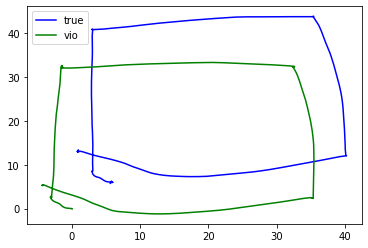

In [16]:
xy_plot(true_xyz[bag], vio_xyz[bag])

In [17]:
from skimage import transform

In [19]:
true_xyz[bag]

,header.stamp.secs,header.stamp.nsecs,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w
0,1658858737,26846144,5.637090,5.745588,-0.707876,-0.000226,0.012559,-0.728013,-0.685448
1,1658858737,76846144,5.638082,5.747875,-0.711780,-0.000217,0.012575,-0.728008,-0.685453
2,1658858737,126845632,5.638878,5.750057,-0.715570,-0.000216,0.012594,-0.728002,-0.685459
3,1658858737,176845632,5.639523,5.752515,-0.719533,-0.000210,0.012605,-0.727991,-0.685470
4,1658858737,226849728,5.639991,5.755163,-0.723814,-0.000209,0.012635,-0.727987,-0.685475
...,...,...,...,...,...,...,...,...,...
2265,1658858850,275892224,0.945700,13.315703,-0.517688,0.009002,0.008049,-0.686695,-0.726846
2266,1658858850,325892480,0.946135,13.319161,-0.515948,0.008998,0.008045,-0.686689,-0.726851
2267,1658858850,375892480,0.946181,13.322652,-0.513201,0.008995,0.008031,-0.686683,-0.726857
2268,1658858850,425892480,0.945939,13.326114,-0.510026,0.008980,0.008031,-0.686674,-0.726866


In [27]:
vio_xyz[bag].loc[0]['secs']

1658858756.0

In [34]:
vio_xyz[bag]

,secs,nsecs,x_pos,y_pos,z_pos,x_orient,y_orient,z_orient,w_orient
0,1.658859e+09,795247793.0,-0.052785,-0.055288,0.403937,0.974834,-0.020877,-0.194019,0.107793
1,1.658859e+09,861908436.0,-0.023791,-0.070103,0.412379,0.975304,-0.031378,-0.200452,0.087269
2,1.658859e+09,928598642.0,-0.015531,-0.053471,0.477829,0.974641,-0.036791,-0.203240,0.086116
3,1.658859e+09,995259523.0,-0.007347,0.002086,0.555226,0.974457,-0.039204,-0.201565,0.090932
4,1.658859e+09,61749697.0,-0.001299,0.046082,0.623552,0.975094,-0.040353,-0.201119,0.084344
...,...,...,...,...,...,...,...,...,...
1400,1.658859e+09,173269987.0,5.391720,4.266072,1.073795,0.980988,-0.057567,-0.185104,-0.009183
1401,1.658859e+09,239874125.0,5.391779,4.266038,1.073467,0.980984,-0.057568,-0.185126,-0.009176
1402,1.658859e+09,306559324.0,5.391714,4.266067,1.073799,0.980988,-0.057562,-0.185108,-0.009184
1403,1.658859e+09,373270750.0,5.391783,4.266034,1.073464,0.980984,-0.057566,-0.185128,-0.009166


In [109]:
true_xyz[bag]

,header.stamp.secs,header.stamp.nsecs,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w
0,1658858737,26846144,5.637090,5.745588,-0.707876,-0.000226,0.012559,-0.728013,-0.685448
1,1658858737,76846144,5.638082,5.747875,-0.711780,-0.000217,0.012575,-0.728008,-0.685453
2,1658858737,126845632,5.638878,5.750057,-0.715570,-0.000216,0.012594,-0.728002,-0.685459
3,1658858737,176845632,5.639523,5.752515,-0.719533,-0.000210,0.012605,-0.727991,-0.685470
4,1658858737,226849728,5.639991,5.755163,-0.723814,-0.000209,0.012635,-0.727987,-0.685475
...,...,...,...,...,...,...,...,...,...
2265,1658858850,275892224,0.945700,13.315703,-0.517688,0.009002,0.008049,-0.686695,-0.726846
2266,1658858850,325892480,0.946135,13.319161,-0.515948,0.008998,0.008045,-0.686689,-0.726851
2267,1658858850,375892480,0.946181,13.322652,-0.513201,0.008995,0.008031,-0.686683,-0.726857
2268,1658858850,425892480,0.945939,13.326114,-0.510026,0.008980,0.008031,-0.686674,-0.726866


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


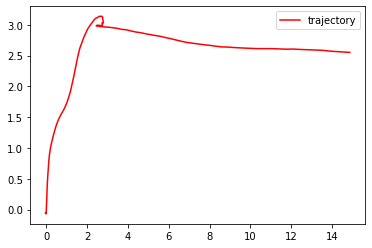

In [110]:
plot_1traj(vio_xyz[bag].x_pos[0:250], vio_xyz[bag].y_pos[0:250])

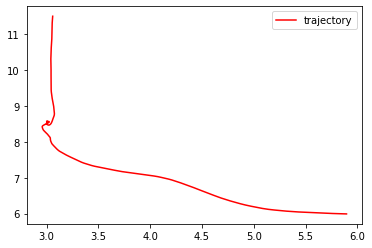

In [111]:
plot_1traj(true_xyz[bag]['pose.position.x'][400:650], true_xyz[bag]['pose.position.y'][400:650])

In [112]:
vio_inp = np.array([[vio_xyz[bag].x_pos[elem], vio_xyz[bag].y_pos[elem]] for elem in range(250)])

In [113]:
true_inp = np.array([[true_xyz[bag]['pose.position.x'][400 + elem], true_xyz[bag]['pose.position.y'][400 + elem]] for elem in range(250)])

In [114]:
tfmatrix = transform.estimate_transform('euclidean', true_inp, vio_inp)

In [115]:
tfmatrix

<EuclideanTransform(matrix=
    [[-0.17454759,  0.98464874, -3.47787805],
     [-0.98464874, -0.17454759,  7.35765892],
     [ 0.        ,  0.        ,  1.        ]]) at 0x7ff3ddefa250>

In [116]:
vio_inp = [np.append(elem, 1) for elem in vio_inp]
true_inp = [np.append(elem, 1) for elem in true_inp]

In [117]:
newtrue = np.matmul(true_inp, tfmatrix)

In [93]:
vio_inp

[array([-0.0527852 , -0.05528848,  1.        ]),
 array([-0.02379073, -0.07010309,  1.        ]),
 array([-0.01553139, -0.05347109,  1.        ]),
 array([-0.00734682,  0.00208579,  1.        ]),
 array([-0.00129883,  0.04608227,  1.        ]),
 array([0.00595858, 0.10030127, 1.        ]),
 array([0.01175858, 0.16578779, 1.        ]),
 array([0.01863404, 0.23839382, 1.        ]),
 array([0.02691569, 0.31558382, 1.        ]),
 array([0.03661301, 0.39659792, 1.        ]),
 array([0.04861663, 0.47418017, 1.        ]),
 array([0.0632146 , 0.54990859, 1.        ]),
 array([0.07920718, 0.62365217, 1.        ]),
 array([0.09552793, 0.70584422, 1.        ]),
 array([0.11464815, 0.79151193, 1.        ]),
 array([0.13976987, 0.8763631 , 1.        ]),
 array([0.17307176, 0.95668121, 1.        ]),
 array([0.21361451, 1.03250315, 1.        ]),
 array([0.26041126, 1.10223829, 1.        ]),
 array([0.31251478, 1.17058085, 1.        ]),
 array([0.36776052, 1.24068759, 1.        ]),
 array([0.42326792,

In [105]:
#newtrue = [[elem[0]/elem[2], elem[1]/elem[2], elem[2]/elem[2]] for elem in newtrue]

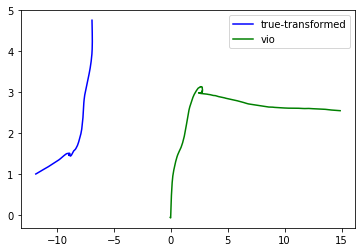

In [120]:
plot_2traj([elem[0] for elem in newtrue], [elem[1] for elem in newtrue], vio_xyz[bag].x_pos[0:250], vio_xyz[bag].y_pos[0:250])

In [106]:
newtrue

[[-0.28198161639816627, 0.193767790744191, 1.0],
 [-0.2799530257212563, 0.19085097107883642, 1.0],
 [-0.277792318406332, 0.18774404363366481, 1.0],
 [-0.27538764505157276, 0.18428472800039067, 1.0],
 [-0.2728068338202636, 0.1805706658234385, 1.0],
 [-0.2701513905585033, 0.1767491775395758, 1.0],
 [-0.26746454638957995, 0.17288249894940713, 1.0],
 [-0.264830797385563, 0.1690925620572179, 1.0],
 [-0.26223133373186197, 0.16535141957193822, 1.0],
 [-0.2595975626665639, 0.16155937785120658, 1.0],
 [-0.25694243822350327, 0.15773503447622728, 1.0],
 [-0.25423138466705475, 0.15382757658447882, 1.0],
 [-0.25148503670159345, 0.1498667247042913, 1.0],
 [-0.24875743550989984, 0.14593091590820048, 1.0],
 [-0.24607785942455068, 0.1420621367950249, 1.0],
 [-0.243279669539098, 0.13801614908369728, 1.0],
 [-0.24049477369865654, 0.13398417289014397, 1.0],
 [-0.2377444007689108, 0.13000039346970438, 1.0],
 [-0.23505773289072515, 0.12610700580043638, 1.0],
 [-0.23249880953914712, 0.12239508977800297, 1.0]